<a href="https://colab.research.google.com/github/liady/sf-bike-sharing/blob/master/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.2MB/s 
     |████████████████████████████████| 501kB 44.8MB/s 
     |████████████████████████████████| 3.1MB 31.8MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


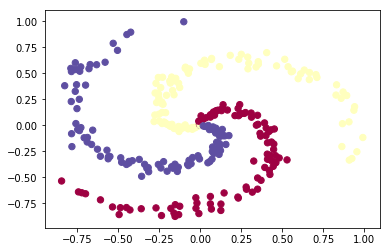

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.utils import shuffle

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in np.arange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:

X, y = shuffle(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [0]:
network = keras.Sequential([
    keras.layers.Dense(100, input_dim=2, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

network.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

y_categorical = to_categorical(y)

history = network.fit(X, y_categorical, validation_split=0.25, epochs=400)

Train on 225 samples, validate on 75 samples
Epoch 1/400
225/225 [==============================] - 0s 1ms/sample - loss: 1.1296 - acc: 0.3067 - val_loss: 1.1076 - val_acc: 0.3067
Epoch 2/400
225/225 [==============================] - 0s 87us/sample - loss: 1.0962 - acc: 0.3644 - val_loss: 1.0836 - val_acc: 0.3467
Epoch 3/400
225/225 [==============================] - 0s 101us/sample - loss: 1.0702 - acc: 0.4622 - val_loss: 1.0631 - val_acc: 0.3600
Epoch 4/400
225/225 [==============================] - 0s 92us/sample - loss: 1.0466 - acc: 0.5022 - val_loss: 1.0453 - val_acc: 0.4133
Epoch 5/400
225/225 [==============================] - 0s 80us/sample - loss: 1.0260 - acc: 0.5378 - val_loss: 1.0277 - val_acc: 0.4667
Epoch 6/400
225/225 [==============================] - 0s 77us/sample - loss: 1.0060 - acc: 0.5600 - val_loss: 1.0126 - val_acc: 0.4933
Epoch 7/400
225/225 [==============================] - 0s 82us/sample - loss: 0.9881 - acc: 0.5600 - val_loss: 0.9957 - val_acc: 0.4933
Epo

In [0]:
def plot_decision_boundary(X, y, model, steps=100, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """

    # Define region of interest by data limits
    x_span = np.linspace(-1, 1, steps)
    y_span = np.linspace(-1, 1, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=plt.cm.Spectral, alpha=0.25)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral, lw=0)

    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5efec7a6a0>)

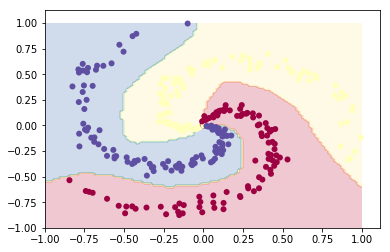

In [0]:
plot_decision_boundary(X, y, network)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    unique = unique_labels(y_true, y_pred)
    print(unique)
    print(classes)
    classes=classes[unique]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[0 1 2]
[0 1 2]
Confusion matrix, without normalization
[[ 91   0  10]
 [  9 100   3]
 [  0   0  87]]


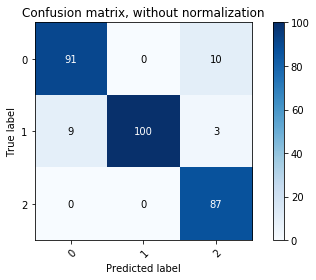

In [0]:
plot_confusion_matrix(np.argmax(network.predict(X), axis=1), y, classes = np.array([0,1,2]))

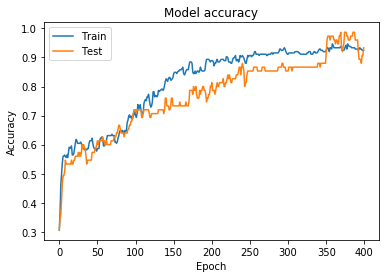

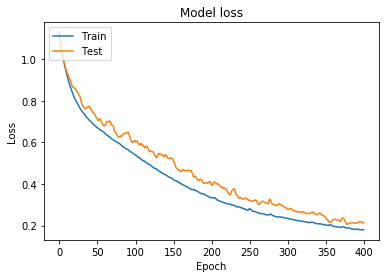

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()